### Importing Libraries

In [3]:
#manuplaters
import pandas as pd
import numpy as np

#visualizers
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

#encoder
from mlxtend.preprocessing import TransactionEncoder

#Model
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### DATA EXPLORATION

In [4]:
raw_data = pd.read_csv("/Users/paramjaswal/Desktop/Market-Basket-Analysis/Data.csv", sep=';')
raw_data.head(10)

/var/folders/dy/0p2_mb093ps8390h87cvhc6m0000gn/T/ipykernel_86203/1291404163.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("/Users/paramjaswal/Desktop/Market-Basket-Analysis/Data.csv", sep=';')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,01.12.2010 08:26,"7,65",17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,01.12.2010 08:26,"4,25",17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,01.12.2010 08:28,"1,85",17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,01.12.2010 08:28,"1,85",17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,01.12.2010 08:34,"1,69",13047.0,United Kingdom


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [6]:
raw_data.describe()

,Quantity,CustomerID
count,522064.000000,388023.000000
mean,10.090435,15316.931710
std,161.110525,1721.846964
min,-9600.000000,12346.000000
25%,1.000000,13950.000000
50%,3.000000,15265.000000
75%,10.000000,16837.000000
max,80995.000000,18287.000000


In [7]:
print("#" * 100)
print(f"Data has {raw_data.shape[1]} columns and {raw_data.shape[0]} rows")
print("#" * 100)

####################################################################################################
Data has 7 columns and 522064 rows
####################################################################################################


### DATA PREPRATION

In [8]:
# Interpreting Null values
null = raw_data.isnull().sum().to_frame().rename(columns = {0:'count'})
null['%'] = (null['count'] / len(raw_data)) * 100
print("#" * 100)
print("Null Values Count")
print("#" * 100)
(null)

####################################################################################################
Null Values Count
####################################################################################################


,count,%
BillNo,0,0.000000
Itemname,1455,0.278701
Quantity,0,0.000000
Date,0,0.000000
Price,0,0.000000
CustomerID,134041,25.675205
Country,0,0.000000


In [9]:
# Converting Date Column
raw_data['Date'] = pd.to_datetime(raw_data['Date'], format='%d.%m.%Y %H:%M')

In [10]:
raw_data["Price"] = raw_data["Price"].str.replace(',', '.').astype(float)
raw_data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [11]:
# Total price is predictable
raw_data["Total_Price"] = raw_data["Quantity"] * raw_data["Price"]
raw_data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total_Price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


### ANALYZE ANY RElATION FOR THE MISSING DATA

In [12]:
# For categorical data, see if certain categories have more missing values
print(raw_data.groupby('Country')['Itemname'].apply(lambda x: x.isnull().mean()))
print(raw_data.groupby('Country')['CustomerID'].apply(lambda x: x.isnull().mean()))

# For continuous data, compare means with and without missing data
print(raw_data.groupby(raw_data['Itemname'].isnull())['Price'].mean())
print(raw_data.groupby(raw_data['CustomerID'].isnull())['Price'].mean())

Country
Australia               0.000000
Austria                 0.000000
Bahrain                 0.000000
Belgium                 0.000000
Brazil                  0.000000
France                  0.000000
Germany                 0.000000
Greece                  0.000000
Hong Kong               0.000000
Iceland                 0.000000
Israel                  0.000000
Italy                   0.000000
Japan                   0.000000
Lebanon                 0.000000
Lithuania               0.000000
Malta                   0.000000
Netherlands             0.000000
Norway                  0.000000
Poland                  0.000000
Portugal                0.000000
RSA                     0.000000
Saudi Arabia            0.000000
Singapore               0.000000
Spain                   0.000000
Sweden                  0.000000
Switzerland             0.000000
USA                     0.000000
United Arab Emirates    0.000000
United Kingdom          0.002984
Unspecified             0.000000
Na

In [13]:
# Assuming 'Date' is converted to datetime format
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data['Month'] = raw_data['Date'].dt.month

# Analyzing missingness by month
print(raw_data.groupby('Month')['Itemname'].apply(lambda x: x.isnull().mean()))
print(raw_data.groupby('Month')['CustomerID'].apply(lambda x: x.isnull().mean()))


Month
1     0.003332
2     0.002445
3     0.004712
4     0.007796
5     0.003861
6     0.002584
7     0.004088
8     0.002430
9     0.002058
10    0.001802
11    0.000912
12    0.002120
Name: Itemname, dtype: float64
Month
1     0.386194
2     0.271486
3     0.252584
4     0.231555
5     0.223885
6     0.252534
7     0.314168
8     0.223556
9     0.193055
10    0.171390
11    0.231410
12    0.354304
Name: CustomerID, dtype: float64


### For Itemname, consider investigating data collection practices in the UK. For CustomerID, this issue is more widespread, particularly affecting international transactions. Understanding operational differences in these regions could provide clues.
### The link between higher average transaction values and missing CustomerID data suggests a specific subset of transactions might be systematically missing this information. Identifying these transaction types could help in developing targeted strategies for data improvement.

In [14]:
# Dropping rows with itemnames
print("#" * 100)
print(f"Shape before{raw_data.shape}")
raw_data = raw_data.dropna(subset=['Itemname'])
print(f"Shape before{raw_data.shape}")
print("#" * 100)

####################################################################################################
Shape before(522064, 9)
Shape before(520609, 9)
####################################################################################################


In [15]:
# Filling missing customer IDs
raw_data = raw_data.fillna(0)

In [16]:
# Removing transactions with 0 values
print("#" * 100)
print(f"Shape before{raw_data.shape}")
data = raw_data[(raw_data['Quantity']>0) & (raw_data['Price']>0)]
print(f"Shape before{raw_data.shape}")
print("#" * 100)

####################################################################################################
Shape before(520609, 9)


Shape before(520609, 9)
####################################################################################################


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519551 entries, 0 to 522063
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   BillNo       519551 non-null  object        
 1   Itemname     519551 non-null  object        
 2   Quantity     519551 non-null  int64         
 3   Date         519551 non-null  datetime64[ns]
 4   Price        519551 non-null  float64       
 5   CustomerID   519551 non-null  float64       
 6   Country      519551 non-null  object        
 7   Total_Price  519551 non-null  float64       
 8   Month        519551 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 39.6+ MB


### VISUALIZATIONS

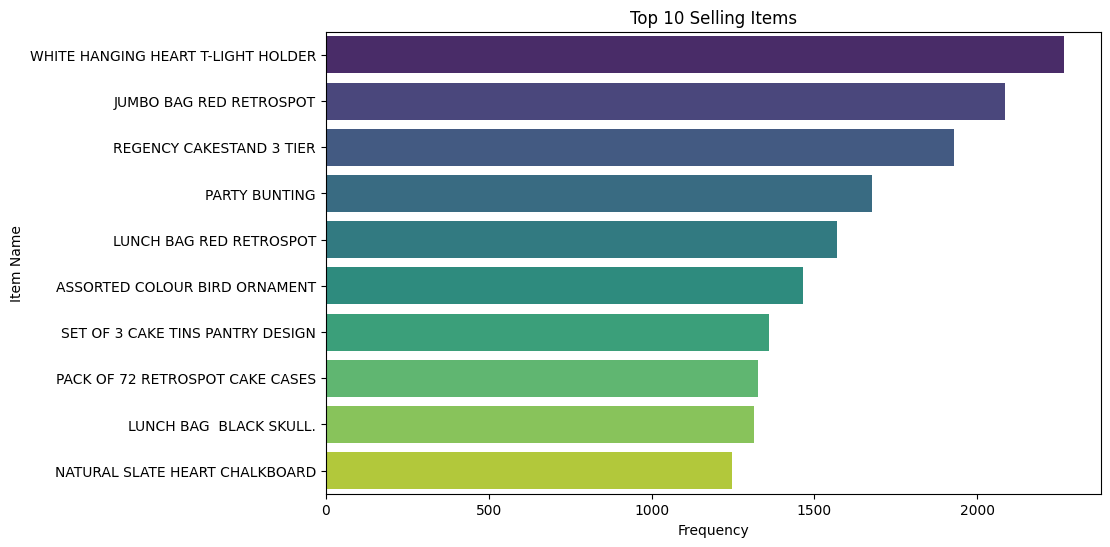

In [18]:
# Top Selling Items in our data
top_items = data['Itemname'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette="viridis")
plt.title('Top 10 Selling Items')
plt.xlabel('Frequency')
plt.ylabel('Item Name')
plt.show()

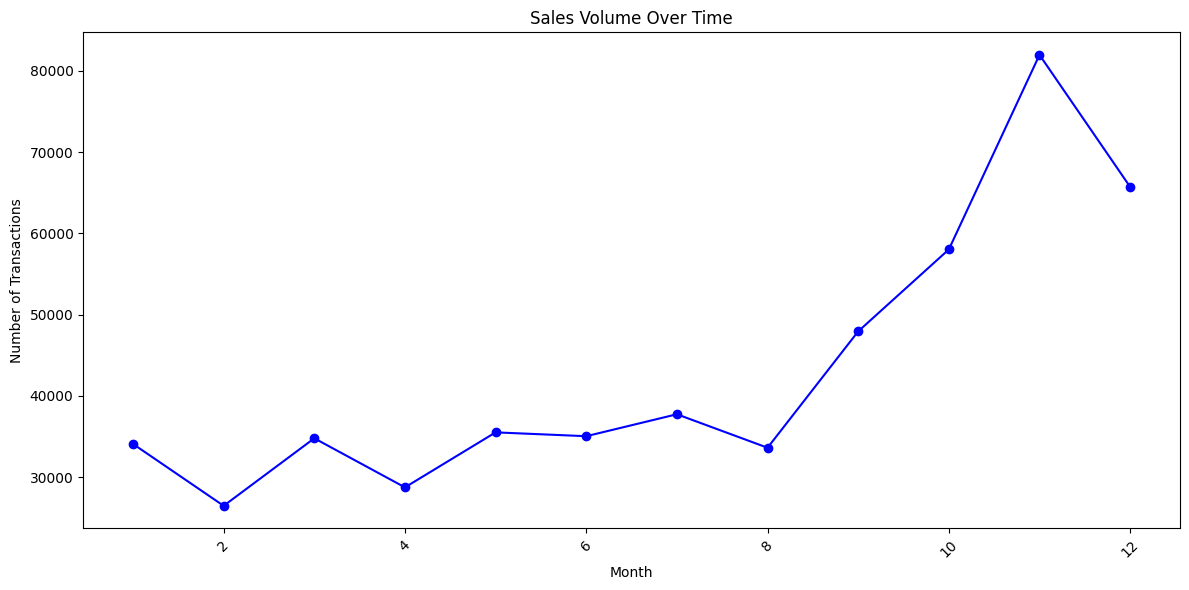

In [19]:
# Aggregating sales in month, visualization with line graph


sales_over_time = data.groupby('Month').size()

plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Sales Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

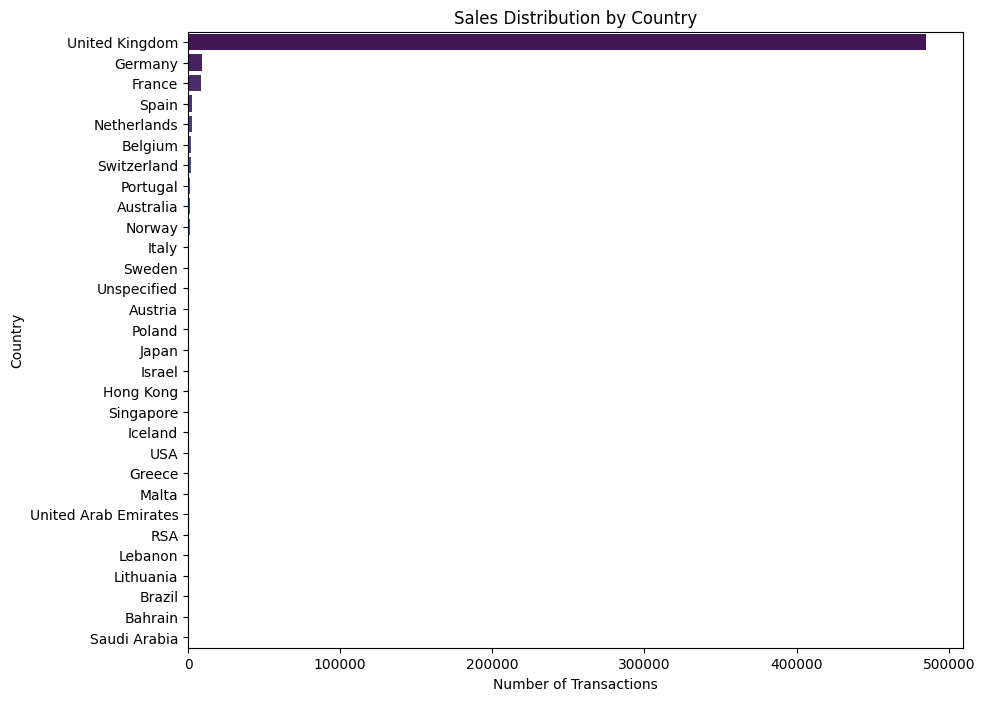

In [20]:
# Sales through Countries
sales_by_country = data['Country'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=sales_by_country.values, y=sales_by_country.index, palette="viridis")
plt.title('Sales Distribution by Country')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()

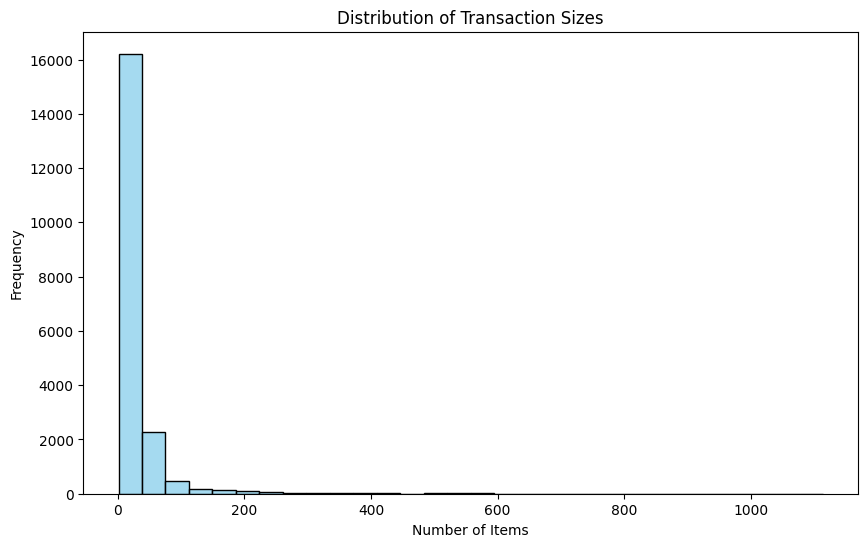

In [21]:
# Transaction size grouping
transaction_sizes = data.groupby('BillNo').size()

plt.figure(figsize=(10, 6))
sns.histplot(transaction_sizes, bins=30, kde=False, color='skyblue')
plt.title('Distribution of Transaction Sizes')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

/var/folders/dy/0p2_mb093ps8390h87cvhc6m0000gn/T/ipykernel_86203/1241586133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.to_period('M')


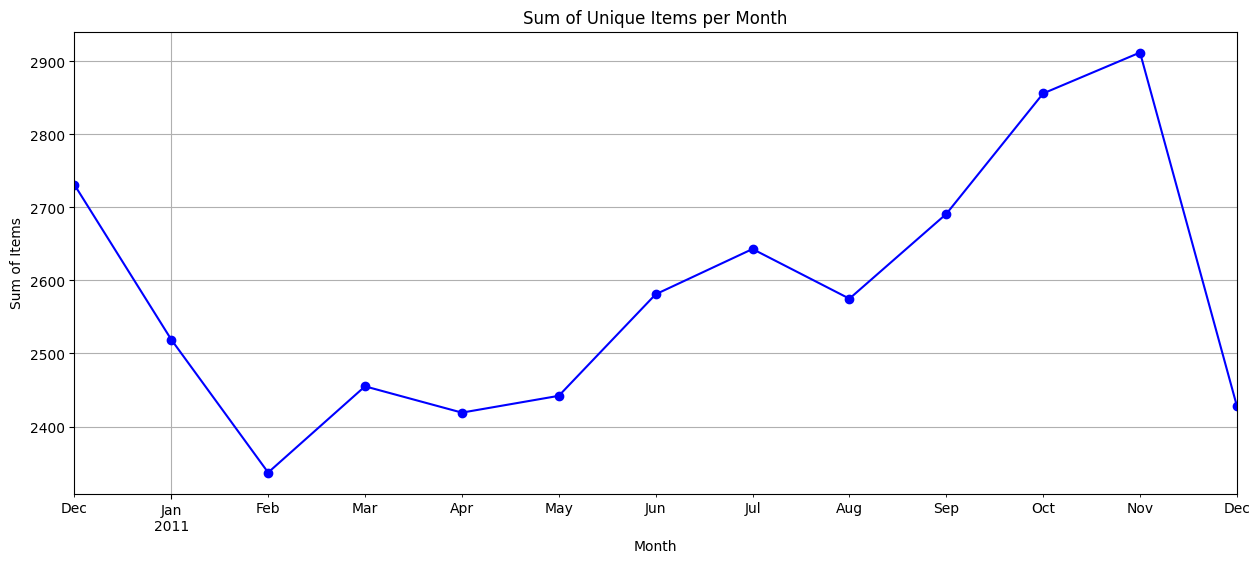

In [22]:
# Unique Items sold over the months
data['Month'] = data['Date'].dt.to_period('M')

monthly_items_overtime = data.groupby('Month')['Itemname'].nunique()
plt.figure(figsize=(15,6))
monthly_items_overtime.plot(kind='line', marker='o', color='b')
plt.title('Sum of Unique Items per Month')
plt.xlabel('Month')
plt.ylabel('Sum of Items')
plt.grid(True)
plt.show()

In [23]:
# Let's create a list of transactions. Each transaction is a list of items bought together
transactions = data.groupby('BillNo')['Itemname'].apply(list).tolist()
# Encoding
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions)
transactions_encoded_df = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

transactions_encoded_df.head(10)

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Running Arpriori to find frequent items

frequent_itemsets = apriori(transactions_encoded_df, min_support=0.01, use_colnames=True)

frequent_itemsets.head()

,support,itemsets
0,0.015950,(10 COLOUR SPACEBOY PEN)
1,0.012678,(12 MESSAGE CARDS WITH ENVELOPES)
2,0.018046,(12 PENCIL SMALL TUBE WOODLAND)
3,0.018404,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.018046,(12 PENCILS SMALL TUBE SKULL)


In [25]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.011963,0.561151,8.582233
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.022238,0.545113,8.336944
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.014007,0.657074,13.291656
3,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE PINK),0.010736,0.503597,12.978740
4,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.014519,0.681055,12.971879
...,...,...,...,...,...
913,"(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...","(RED RETROSPOT CHARLOTTE BAG, WOODLAND CHARLOT...",0.010378,0.751852,29.296761
914,"(CHARLOTTE BAG SUKI DESIGN, RED RETROSPOT CHAR...","(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...",0.010378,0.611446,30.511457
915,"(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...","(CHARLOTTE BAG SUKI DESIGN, RED RETROSPOT CHAR...",0.010378,0.517857,30.511457
916,"(STRAWBERRY CHARLOTTE BAG, WOODLAND CHARLOTTE ...","(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...",0.010378,0.502475,29.966214


In [26]:
top_10_rules = rules.sort_values('confidence', ascending=False).head(10)
top_10_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.010531,0.036092,0.010276,0.975728,27.034304,0.009895,39.713000,0.973260
347,"(JAM MAKING SET PRINTED, SUKI SHOULDER BAG)",(DOTCOM POSTAGE),0.011145,0.036092,0.010685,0.958716,26.562940,0.010282,23.347988,0.973200
431,"(HERB MARKER PARSLEY, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.010736,0.011963,0.010224,0.952381,79.613350,0.010096,20.748786,0.998155
432,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010736,0.011911,0.010224,0.952381,79.955038,0.010097,20.749859,0.998209
425,"(HERB MARKER THYME, HERB MARKER BASIL)",(HERB MARKER ROSEMARY),0.010531,0.011963,0.010020,0.951456,79.536055,0.009894,20.353571,0.997937
772,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROSES)",(REGENCY TEA PLATE GREEN),0.012729,0.018148,0.012065,0.947791,52.224628,0.011834,18.806235,0.993499
427,"(HERB MARKER BASIL, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010685,0.011911,0.010020,0.937799,78.730846,0.009893,15.885424,0.997961
783,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.012269,0.025305,0.011451,0.933333,36.882694,0.011141,14.620418,0.984972
123,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011911,0.011963,0.011094,0.931330,77.853655,0.010951,14.388295,0.999056
124,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.011963,0.011911,0.011094,0.927350,77.853655,0.010951,13.600748,0.999107
